<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module6/M6_2/0_Pharmacy_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pharmacy [extracted from the textbook]

**OPIM 5641: Business Decision Modeling - Dept. of Operations and Information Management - University of Connecticut**

-----------------
A basic curve fitting example.


## Setup Your Environment/Imports

In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        #!apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

     |████████████████████████████████| 9.0MB 3.0MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 256kB 36.4MB/s 
     |████████████████████████████████| 163kB 44.3MB/s 


# Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is one of the most important techniques employed in business analytics. In a linear regression problem, we are given a dataset consisting of a list of pairs of elements $(x,z(x))$, where $x$ is some controlable or observable value (e.g., number of years of study) and $z(x)$ is the target value (e.g., expected salary in the future). The goal of linear regression is to come up with a formula that will allow us to guess $z(x)$ given $x$ based on historic data.


When using **linear** regression, we assume that a certain phenomenon can be predicted by a linear expression, i.e.:

$𝑦(𝑥)=𝑎+b𝑥$,

where $x$ is the observable value and $y(x)$ is our estimatethe value we want to guess which depends linearly on $x$. In our example, if pairs $(10,50000)$ and $(20,100000)$ belong to our dataset, this formula would probably indicate that, if $x = 15$, the value of $y(x)$ would be 75000.

Linear regression is about finding $a$ and $b$ such that the formula $y(x) = a + bx$ approximates the actual value $z(x)$ as well as possible. In general, though, the formula behind the actual value of $z(x)$ may not be linear, so we should expect our formula to make **errors**. 

We can cast the linear regression problem as follows: given a set $X$ of values $(x,z(x))$, our goal is to find $a$ and $b$ such that the sum of the errors is minimized, i.e., we want to find $a$ and $b$ that minimize the **least square error**, which is given by the following expression:

$\sum\limits_{x \in X}(y(x) - z(x))^2$

## Pharmacy (Extracted from the textbook)

A pharmacy has hired you to create a predictive model for determining, based on the number of hours that the pharmacy is open each week, the revenue.  Data from previous weeks is provided below:

Hours	| Revenue
---|---
	40	|5958
	44	| 6662
	48	| 6004
	48	| 6011
	60	|7250
	70	|8632
	72	|6964
	90	|11097
	100	|9107
	168	|11498


# Item 1 
Suppose that we assume a linear model, that is,

$
\textrm{Revenue} = a + b \times Hours
$

Create an optimization model to find $a$ and $b$ using least square errors as your error function, i.e., you want to find $a$ and $b$ that minimize the least square error, given by

$\sum\limits_{x \in X}(y(x) - z(x))^2$.


## Data

For problems like this, it is extremely convenient to separate the data from the model.

In [ ]:
X = [
      40,
      44,
     48,
     48,
     60,
     70,
     72,
     90,
     100,
     168
]
Z = [
     5958,
     6662,
     6004,
     6011,
     7250,
     8632,
     6964,
     11097,
     9107,
     11498
]


### Solving with Python libraries

Linear regression is a very traditional problem, so there are libraries and functions in Python to solve the problem. So, before solving the problem using an optimization model, let's see how to solve it using [Scipy](https://www.scipy.org/) (in a single line!).

a: 4435.083751    b: 47.070490


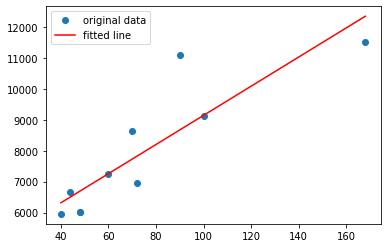

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

# we are going to use scipy, so it will be better to convert our lists into numpy arrays
XX = np.array(X)
ZZ = np.array(Z)

# the values we care about are the first two returned by the function
b, a, r_value, p_value, std_err = stats.linregress(XX, ZZ)
print("a: %f    b: %f" % (a, b))

# first, let's plot the original data
plt.plot(XX, ZZ, 'o', label='original data')
# now, let's plot the line we got; note that we are using the linear regression expression as the second parameter of the plot function
plt.plot(XX, a + b*XX, 'r', label='fitted line')
plt.legend()
plt.show()

### Using optimization to solve the problem

Now you will derive an optimization problem to solve the same problem. You will see that we will get exactly the same results.

**Objective Function**

$\min   \sum\limits_{i \in |X|}(y_i - z_i)^2$ `(objective function)`

**Write the Constraints**

subject to:
* $y_i = a + b \cdot x_i, \forall i \in |X|$ `(calculate estimates)`

`Domains`
* $a,b \in \mathbb{R}$ `(Parameters of linear regression)`
* $y_i \in \mathbb{R}, i \in [|X|]$ `(estimates for each data point)`


In [ ]:
# declare the model
model = ConcreteModel()

n_points = len(X)

# declare decision variables
model.a = Var(domain=Reals,initialize = 1)
model.b = Var(domain=Reals, initialize = 1)
model.y = Var([i for i in range(n_points)],domain=Reals)

# Constraints
model.constraints = ConstraintList()
# Predicted value
for i in range(n_points):
  x = X[i]
  model.constraints.add(model.y[i] == model.a + x*model.b)

# declare objective
obj_expr = 0
for i in range(n_points):
  obj_expr += (model.y[i] - Z[i])**2
model.error = Objective(
                      expr = obj_expr,
                      sense = minimize)

# show the model you've created
model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    y_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

3 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    y : Size=10, Index=y_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None

In [ ]:
# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()
# show the results
print("Objective value = ", model.error())
print("A = ", model.a())
print("B = ", model.b())
a = model.a()
b = model.b()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 12
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.028242111206054688
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Obje

# Item 2

The sum of the squared differences is not the only way to measure errors.  Create an optimization model to find $a$ and $b$, but this time minimizing the sum of the absolute differences (https://en.wikipedia.org/wiki/Absolute_value). That is, the objective function now should be as follows:

$\sum\limits_{x \in X}|y(x) - z(x)|$



In [ ]:
# declare the model
model2 = ConcreteModel()

n_points = len(X)

# declare decision variables
model2.a = Var(domain=Reals,initialize = 2000)
model2.b = Var(domain=Reals, initialize = 50)
model2.y = Var([i for i in range(n_points)],domain=Reals)

for i in range(n_points):
  model2.y[i] = 0.0

# Constraints
model2.constraints = ConstraintList()
# Predicted value
for i in range(n_points):
  x = X[i]
  model2.constraints.add(model2.y[i] == model2.a + x*model2.b)

# declare objective
obj_expr = 0
for i in range(n_points):
  obj_expr += abs(model2.y[i] - Z[i])
model2.error = Objective(
                      expr = obj_expr,
                      sense = minimize)

# show the model you've created
model2.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    y_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

3 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  2000 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :    50 :  None : False : False :  Reals
    y : Size=10, Index=y_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :   0.0 :  None : False : False :  Reals
          1 :  None :   0.0 :  None : False : False :  Reals
          2 :  None :   0.0 :  None : False : False :  Reals
          3 :  None :   0.0 :  None

In [ ]:
# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model2).write()
# show the results
print("Objective value = ", model2.error())
print("A = ", model2.a())
print("B = ", model2.b())

ValueError: ignored

Ops, we cannot use the function abs() with IPOPT! IPOPT requires functions to be continuous (https://en.wikipedia.org/wiki/Continuous_function) and twice differentiable (https://en.wikipedia.org/wiki/Differentiable_function), and abs() does not satisfy one of these conditions (which one?)

How can we address this issue? Try to think about a way of formulating the abs() function before checking the solution below. Tip: you can use linear expression for that.

In [ ]:
# Each variable abs[i] will represent |y[i] - z[i]|
model2.abs_value = Var([i for i in range(n_points)],domain=NonNegativeReals)

# The following constrains enforce abs[i] >= |y[i] - z[i]|
for i in range(n_points):
  model2.constraints.add(model2.abs_value[i] >= model2.y[i] - Z[i])
  model2.constraints.add(model2.abs_value[i] >= -(model2.y[i] - Z[i]))

# Because we want to minimize the sum of absolute values, the solver will pick the smallest possible values of abs[i]. Therefore, we will have abs[i] = |y[i] - z[i]|, as we wanted
obj_expr = 0
for i in range(n_points):
  obj_expr += model2.abs_value[i]
model2.error = Objective(
                      expr = obj_expr,
                      sense = minimize)

# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model2).write()
# show the results
print("Objective value = ", model2.error())
print("A = ", model2.a())
print("B = ", model2.b())
a2 = model2.a()
b2 = model2.b()

    'pyomo.core.base.objective.SimpleObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.SimpleObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 30
  Number of variables: 22
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination conditi

### Let's plot both curves

As you can see, they look similar (and equally OK).

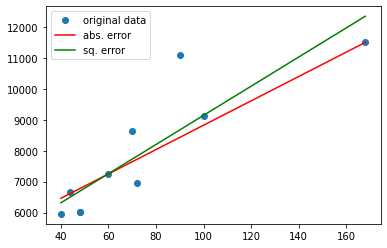

In [ ]:
# first, let's plot the original data
plt.plot(XX, ZZ, 'o', label='original data')
# now, let's plot the line we got; note that we are using the linear regression expression as the second parameter of the plot function
plt.plot(XX, a2 + b2*XX, 'r', label='abs. error')
plt.plot(XX, a + b*XX, 'g', label='sq. error')
plt.legend()
plt.show()

# Item 3-A

Now we are going to see what happens if we replace linear regression for the following expression:

$
\textrm{Revenue} = a \times Hours ^ b
$

First, let's see what happens if we use the expression above and sum of squares as error measure.

**You will probably need to play with a few different initial values before you find a good solution.**

In [ ]:
# declare the model
model3a = ConcreteModel()

n_points = len(X)

# declare decision variables
model3a.a = Var(domain=Reals,initialize = 1000)
model3a.b = Var(domain=Reals, initialize = 1)
model3a.y = Var([i for i in range(n_points)],domain=Reals)

# Constraints
model3a.constraints = ConstraintList()
# Predicted value
for i in range(n_points):
  x = X[i]
  model3a.constraints.add(model3a.y[i] == model3a.a * x**(model3a.b))

# declare objective
obj_expr = 0
for i in range(n_points):
  obj_expr += (model3a.y[i] - Z[i])**2
model3a.error = Objective(
                      expr = obj_expr,
                      sense = minimize)

# show the model you've created
model3a.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    y_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

3 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  1000 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    y : Size=10, Index=y_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None

In [ ]:
# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model3a).write()
# show the results
print("Objective value = ", model3a.error())
print("A = ", model3a.a())
print("B = ", model3a.b())
a3 = model3a.a()
b3 = model3a.b()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 12
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024003028869628906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Obje

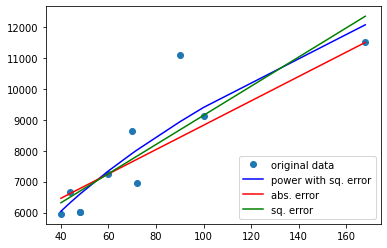

In [ ]:
# first, let's plot the original data
plt.plot(XX, ZZ, 'o', label='original data')
# now, let's plot the line we got; note that we are using the linear regression expression as the second parameter of the plot function
plt.plot(XX, a3*XX**b3, 'b', label='power with sq. error')
plt.plot(XX, a2 + b2*XX, 'r', label='abs. error')
plt.plot(XX, a + b*XX, 'g', label='sq. error')
plt.legend()
plt.show()

# Item 3-B

Now, let's see what happens if we use the exponential expression above and sum of absolute values as error measure.

**You will probably need to play with a few different initial values before you find a good solution.**

In [ ]:
# declare the model
model3b = ConcreteModel()

n_points = len(X)

# declare decision variables
model3b.a = Var(domain=Reals,initialize = 1000)
model3b.b = Var(domain=Reals, initialize = 1)
model3b.y = Var([i for i in range(n_points)],domain=Reals)

# Each variable abs[i] will represent |y[i] - z[i]|
model3b.abs_value = Var([i for i in range(n_points)],domain=NonNegativeReals)


for i in range(n_points):
  model3b.y[i] = 0.0

# Constraints
model3b.constraints = ConstraintList()
# Predicted value
for i in range(n_points):
  x = X[i]
  model3b.constraints.add(model3b.y[i] == (model3b.a * x**model3b.b))


# The following constrains enforce abs[i] >= |y[i] - z[i]|
for i in range(n_points):
  model3b.constraints.add(model3b.abs_value[i] >= model3b.y[i] - Z[i])
  model3b.constraints.add(model3b.abs_value[i] >= -(model3b.y[i] - Z[i]))

# Because we want to minimize the sum of absolute values, the solver will pick the smallest possible values of abs[i]. Therefore, we will have abs[i] = |y[i] - z[i]|, as we wanted
obj_expr = 0
for i in range(n_points):
  obj_expr += model3b.abs_value[i]
model3b.error = Objective(
                      expr = obj_expr,
                      sense = minimize)


# show the model you've created
model3b.pprint()

# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model3b).write()
# show the results
print("Objective value = ", model3b.error())
print("A = ", model3b.a())
print("B = ", model3b.b())
a4 = model3b.a()
b4 = model3b.b()

3 Set Declarations
    abs_value_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   30 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
    y_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

4 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  1000 :  None : False : False :  Reals
    abs_value : Size=10, Index=abs_value_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  No

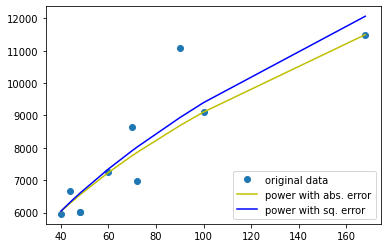

In [ ]:
# first, let's plot the original data
plt.plot(XX, ZZ, 'o', label='original data')
# now, let's plot the line we got; note that we are using the linear regression expression as the second parameter of the plot function
plt.plot(XX, a4*XX**b4, 'y', label='power with abs. error')
plt.plot(XX, a3*XX**b3, 'b', label='power with sq. error')
#plt.plot(XX, a2 + b2*XX, 'r', label='abs. error')
#plt.plot(XX, a + b*XX, 'g', label='sq. error')
plt.legend()
plt.show()